<a href="https://colab.research.google.com/github/amitmohleji/ml-class/blob/main/2-1-6-MimimizingLoss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 # First import the functions we will need
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# GradientTape

The Calculus is managed by a TensorFlow Gradient Tape. You can learn more about the gradient tape at https://www.tensorflow.org/api_docs/python/tf/GradientTape, and we will discuss it later in the course.

In [2]:
# Define our initial guess
INITIAL_W = 10.0
INITIAL_B = 10.0

# Define our loss function
def loss(predicted_y, target_y):
  return tf.reduce_mean(tf.square(predicted_y - target_y))

# Define our training procedure
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
    # Here is where you differentiate the model values with respect to the loss function
    dw, db = t.gradient(current_loss, [model.w, model.b])
    # And here is where you update the model values based on the learning rate chosen
    model.w.assign_sub(learning_rate * dw)
    model.b.assign_sub(learning_rate * db)
    return current_loss

# Define our simple linear regression model
class Model(object):
  def __init__(self):
    # Initialize the weights
    self.w = tf.Variable(INITIAL_W)
    self.b = tf.Variable(INITIAL_B)

  def __call__(self, x):
    return self.w * x + self.b

### Train our model

In [31]:
# Define our input data and learning rate
xs = [-1.0, 0.0, 1.0, 2.0, 3.0, 4.0]
ys = [-3.0, -1.0, 1.0, 3.0, 5.0, 7.0]
LEARNING_RATE=0.16

# Instantiate our model
model = Model()

# Collect the history of w-values and b-values to plot later
list_w, list_b = [], []
epochs = range(100)
losses = []
for epoch in epochs:
  list_w.append(model.w.numpy())
  list_b.append(model.b.numpy())
  current_loss = train(model, xs, ys, learning_rate=LEARNING_RATE)
  losses.append(current_loss)
  print('Epoch %2d: w=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, list_w[-1], list_b[-1], current_loss))

Epoch  0: w=10.00 b=10.00, loss=715.66669
Epoch  1: w=-8.51 b=2.64, loss=468.86533
Epoch  2: w=7.12 b=6.52, loss=307.23541
Epoch  3: w=-4.95 b=1.66, loss=201.36572
Epoch  4: w=5.27 b=4.14, loss=132.00671
Epoch  5: w=-2.60 b=0.93, loss=86.55826
Epoch  6: w=4.08 b=2.52, loss=56.77133
Epoch  7: w=-1.05 b=0.40, loss=37.24466
Epoch  8: w=3.32 b=1.41, loss=24.44105
Epoch  9: w=-0.02 b=0.01, loss=16.04365
Epoch 10: w=2.84 b=0.65, loss=10.53469
Epoch 11: w=0.66 b=-0.28, loss=6.91962
Epoch 12: w=2.53 b=0.14, loss=4.54667
Epoch 13: w=1.11 b=-0.48, loss=2.98857
Epoch 14: w=2.33 b=-0.22, loss=1.96517
Epoch 15: w=1.41 b=-0.63, loss=1.29275
Epoch 16: w=2.21 b=-0.46, loss=0.85077
Epoch 17: w=1.61 b=-0.74, loss=0.56015
Epoch 18: w=2.13 b=-0.63, loss=0.36898
Epoch 19: w=1.74 b=-0.81, loss=0.24317
Epoch 20: w=2.08 b=-0.75, loss=0.16034
Epoch 21: w=1.83 b=-0.87, loss=0.10578
Epoch 22: w=2.05 b=-0.83, loss=0.06983
Epoch 23: w=1.88 b=-0.91, loss=0.04612
Epoch 24: w=2.03 b=-0.88, loss=0.03048
Epoch 25: w=1.

### Plot our trained values over time

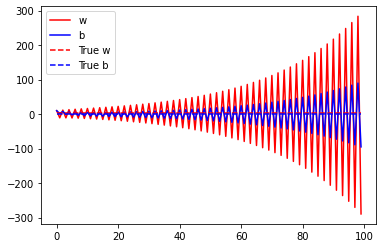

In [23]:
# Plot the w-values and b-values for each training Epoch against the true values
TRUE_w = 2.0
TRUE_b = -1.0
plt.plot(epochs, list_w, 'r', epochs, list_b, 'b')
plt.plot([TRUE_w] * len(epochs), 'r--', [TRUE_b] * len(epochs), 'b--')
plt.legend(['w', 'b', 'True w', 'True b'])
plt.show()